In [43]:
import pandas as pd

df = pd.read_csv("../data/world_trade_1929_1933.csv")
display(df)

,Month,1929,1930,1931,1932,1933
0,I,2997.7,2738.9,1838.9,1206.0,992.4
1,II,2630.3,2454.6,1700.5,1186.7,944.0
2,III,2814.8,2563.9,1889.1,1230.4,1056.9
3,IV,3039.1,2449.9,1796.4,1212.8,NaN
4,V,2967.6,2447.0,1764.3,1150.5,NaN
5,VI,2781.0,2325.7,1732.3,1144.7,NaN
6,VII,2813.9,2189.5,1679.6,993.7,NaN
7,VIII,2818.3,2137.7,1585.9,1004.6,NaN
8,IX,2773.9,2164.8,1572.1,1029.6,NaN
9,X,2966.8,2300.8,1556.3,1090.4,NaN


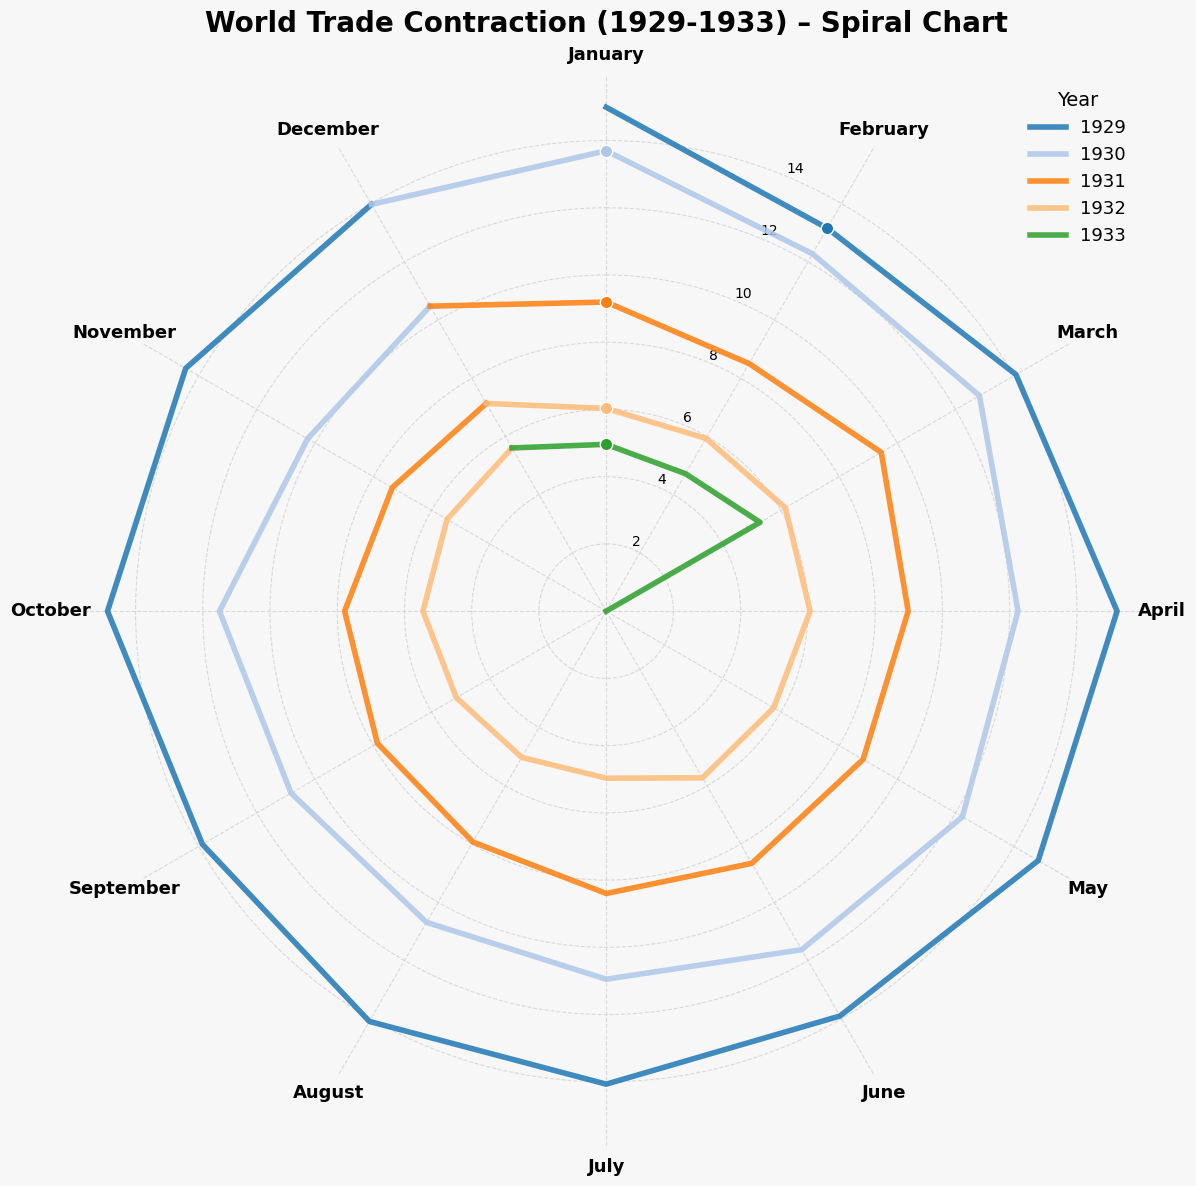

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps


df = df.iloc[:-1]
df.fillna(0, inplace=True)

roman_months = [
    "I",
    "II",
    "III",
    "IV",
    "V",
    "VI",
    "VII",
    "VIII",
    "IX",
    "X",
    "XI",
    "XII",
]
english_months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

df["Month"] = df["Month"].str.strip()
df_long = df.melt(id_vars=["Month"], var_name="Year", value_name="Value")
df_long["Month"] = pd.Categorical(
    df_long["Month"], categories=roman_months, ordered=True
)
df_long = df_long.sort_values(by=["Year", "Month"]).reset_index(drop=True)

months_per_year = 12
angles = np.linspace(0, 2 * np.pi, months_per_year, endpoint=False)
month_to_angle = dict(zip(roman_months, angles))
df_long["Angle"] = df_long["Month"].map(month_to_angle).astype(float) + (
    df_long["Year"].astype(int) - int(df_long["Year"].min())
) * (2 * np.pi)
df_long["Radius"] = df_long["Value"] / 200

# Plot as a single continuous line, but color by year
fig, ax = plt.subplots(
    subplot_kw={"projection": "polar"}, figsize=(12, 12), facecolor="#f7f7f7"
)
cmap = colormaps.get_cmap("tab20")
years = df_long["Year"].unique()

for i, year in enumerate(years):
    year_data = df_long[df_long["Year"] == year]
    if i > 0:
        prev_year_data = df_long[df_long["Year"] == years[i - 1]]
        year_data = pd.concat([prev_year_data.tail(1), year_data])
    ax.plot(
        year_data["Angle"],
        year_data["Radius"],
        color=cmap(i),
        linewidth=4,
        alpha=0.85,
        label=str(year),
    )
    # Mark the start of each year
    ax.scatter(
        year_data["Angle"].iloc[1],
        year_data["Radius"].iloc[1],
        color=cmap(i),
        s=80,
        edgecolor="white",
        zorder=5,
    )

ax.set_xticks(angles)
ax.set_xticklabels(english_months, fontsize=13, fontweight="bold")
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)

ax.set_facecolor("#f7f7f7")
ax.grid(color="#cccccc", linestyle="--", linewidth=0.8, alpha=0.7)
ax.spines["polar"].set_visible(False)

ax.set_title(
    "World Trade Contraction (1929-1933) – Spiral Chart",
    va="bottom",
    fontsize=20,
    fontweight="bold",
)
ax.legend(
    loc="upper right", title="Year", fontsize=13, title_fontsize=14, frameon=False
)
plt.tight_layout()
plt.savefig("../output/world_trade_spiral_chart_pretty.png", dpi=150)
plt.show()